In [ ]:
import os
from os.path import exists, join, basename, splitext

project_name = splitext(basename(git_repo_url))[0]

!rm -r deep-graph-matching-consensus/ || true
!git clone $git_repo_url

rm: cannot remove 'deep-graph-matching-consensus/': No such file or directory
Cloning into 'GraphMatchingConsensus'...
remote: Enumerating objects: 681, done.
remote: Counting objects: 100% (681/681), done.
remote: Compressing objects: 100% (348/348), done.
remote: Total 681 (delta 374), reused 624 (delta 317), pack-reused 0
Receiving objects: 100% (681/681), 3.61 MiB | 19.98 MiB/s, done.
Resolving deltas: 100% (374/374), done.


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12828799339227035795, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15703311680
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9952781543819205056
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
!cp /content/drive/MyDrive/VOCtrainval_25-May-2011.tar /content/GraphMatchingConsensus/data/PascalVOC-WILLOW/raw

In [ ]:
!apt-get install cuda=10.2.89-1
!pip install pykeops
import pykeops
pykeops.clean_pykeops()          # just in case old build files are still present
pykeops.test_numpy_bindings()    # perform the compilation

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cuda-10-2 cuda-command-line-tools-10-2 cuda-compiler-10-2 cuda-cudart-10-2
  cuda-cudart-dev-10-2 cuda-cufft-10-2 cuda-cufft-dev-10-2 cuda-cuobjdump-10-2
  cuda-cupti-10-2 cuda-cupti-dev-10-2 cuda-curand-10-2 cuda-curand-dev-10-2
  cuda-cusolver-10-2 cuda-cusolver-dev-10-2 cuda-cusparse-10-2
  cuda-cusparse-dev-10-2 cuda-demo-suite-10-2 cuda-documentation-10-2
  cuda-driver-dev-10-2 cuda-gdb-10-2 cuda-libraries-10-2
  cuda-libraries-dev-10-2 cuda-license-10-2 cuda-memcheck-10-2
  cuda-misc-headers-10-2 cuda-npp-10-2 cuda-npp-dev-10-2 cuda-nsight-10-2
  cuda-nsight-compute-10-2 cuda-nsight-systems-10-2 cuda-nvcc-10-2
  cuda-nvdisasm-10-2 cuda-nvgraph-10-2 cuda-nvgraph-dev-10-2 cuda-nvjpeg-10-2
  cuda-nvjpe

In [ ]:
# Add this in a Google Colab cell to install the correct version of Pytorch Geometric.
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.8.1+cu101.html
  Created wheel for torch-scatter: filename=torch_scatter-2.0.6-cp37-cp37m-linux_x86_64.whl size=2885838 sha256=5920bf2f52e940a52de0c5674786a9d1e4de45ae8353969926b15fa5ac469140
  Stored in directory: /root/.cache/pip/wheels/d6/bf/04/7c9e0c1466d37548e5c7c7c2daee2b7f90ce616f102c68bf07
Successfully built torch-scatter
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.1+cu101.html
  Created wheel for torch-sparse: filename=torch_sparse-0.6.9-cp37-cp37m-linux_x86_64.whl size=1227874 sha256=b2f9c2660187103d44338523cc08132c9929d4b433b67d0897265ad593c96ee4
  Stored in directory: /root/.cache/pip/wheels/6c/9f/3e/8813c1f7e87d12b01b830d3506e7f3f6b044d9d53769057ddb
Successfully built torch-sparse
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.1+cu101.html
  Created wheel for torch-cluster: filename=torch_cluster-1.5.9-cp37-cp37m-linux_x86_64.whl size=1040597 sha256=5b217f6137e53ad2dc78fe142be8eb98

In [ ]:
!cd GraphMatchingConsensus && python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:672: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:672: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating dgmc.egg-info
writing dgmc.egg-info/PKG-INFO
writing dependency_links to dgmc.egg-info/dependency_links.txt
writing top-level names to dgmc.egg-info/top_level.txt
writing manifest file 'dgmc.egg-info/SOURCES.txt'
adding license file 'LICENSE' (matched pattern 'LICEN[CS]E*')
reading manifest template 'MANIFEST.in'
writing manifest file 'dgmc.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running

In [ ]:
!cd GraphMatchingConsensus/examples && python willow_modified.py --num_psi 3 --num_layers 3 --isotropic

tcmalloc: large alloc 1765687296 bytes == 0x5632915c6000 @  0x7f03303761e7 0x56321e32ce68 0x56321e2f7637 0x56321e2f9630 0x56321e2faafd 0x56321e3ebfed 0x56321e36e988 0x56321e2fc30a 0x56321e36a60e 0x56321e3694ae 0x56321e2fc3ea 0x56321e36a60e 0x56321e3694ae 0x56321e2fc3ea 0x56321e36a3b5 0x56321e2fc30a 0x56321e36a60e 0x56321e2fc30a 0x56321e36a60e 0x56321e3697ad 0x56321e2fc3ea 0x56321e36e7f0 0x56321e3697ad 0x56321e2fc3ea 0x56321e36e7f0 0x56321e3697ad 0x56321e2fcc9f 0x56321e33dd79 0x56321e33acc4 0x56321e2fb559 0x56321e36f4f8
Extracting ../data/PascalVOC-WILLOW/raw/VOCtrainval_25-May-2011.tar
Extracting ../data/PascalVOC-WILLOW/raw/voc2011_keypoints_Feb2012.tgz
Processing...
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:02<00:00, 243MB/s]
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing..

In [ ]:
import pickle
num = '3'
SL = pickle.load(open("/content/GraphMatchingConsensus/examples/SL" + num + ".p", 'rb'))
y = pickle.load(open("/content/GraphMatchingConsensus/examples/y" + num + ".p", 'rb'))
names = pickle.load(open("/content/GraphMatchingConsensus/examples/names" + num + ".p", 'rb'))
pos = pickle.load(open("/content/GraphMatchingConsensus/examples/pos" + num + ".p", 'rb'))


0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 0.5
7 1.0
8 0.9
9 1.0
10 1.0
11 0.9
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 5, 8, 7, 8, 9], device='cuda:0')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


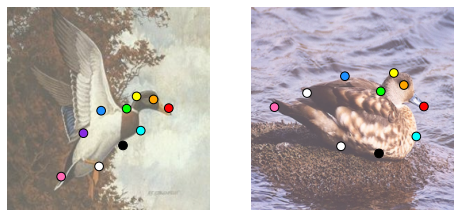

In [ ]:
pred = SL[y[0]].argmax(dim=-1)

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sb
import matplotlib as mpl
mpl.style.use('seaborn')
sb.set_style("white")

# colors = sb.color_palette("husl", 10, as_cmap = True)
colors = ['red', 'orange', 'yellow', 'lime', 'cyan', 'dodgerblue', 'blueviolet','hotpink', 'white', 'black']

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
plt.rcParams.update(rc)

f, ax = plt.subplots(1,2)


num = 11
img = Image.open("/content/GraphMatchingConsensus" + names[0][num][2:] + ".png").convert('RGB')
# img=mpimg.imread("/content/GraphMatchingConsensus" + names[0][0][2:] + ".png")
img = img.resize((256, 256))

points = pos[0][num*10:num*10+10].cpu().numpy()

for i in range(0,20):
  correct = (pred[i*10:i*10+10] == y[1][i*10:i*10+10]).sum().item()
  print(str(i) + " " + str(correct/10))

labels = y[0][num*10:num*10+10].cpu()%10
ax[0].imshow(img, alpha=0.7)
# ax[0].scatter(points[:,0], points[:,1], c='black', s=60)
sb.scatterplot(points[:,0], points[:,1], c=colors, s=75, linewidth=1, edgecolor = 'black', ax=ax[0])


imgt = Image.open("/content/GraphMatchingConsensus" + names[1][num][2:] + ".png").convert('RGB')
imgt = imgt.resize((256, 256))

points = pos[1][num*10:num*10+10].cpu().numpy()

colors2 = [colors[i] for i in pred[num*10:num*10+10].cpu()]
ax[1].imshow(imgt, alpha=0.7)
# ax[1].scatter(points[:,0], points[:,1], c='black', s=60)
sb.scatterplot(points[:,0], points[:,1], c=colors2, s = 75, cmap = colors, linewidth=1, edgecolor = 'black', ax=ax[1])

print(labels)
print(pred[num*10:num*10+10])



In [ ]:
```````````````````````````````````````````````````````````````````````````````````!cd Graph333MatchingConsensus/examples && python willow_modified.py --num_layers 3 --num_psi 3 --isotropic

Using exist file VOCtrainval_25-May-2011.tar
Extracting ../data/PascalVOC-WILLOW/raw/VOCtrainval_25-May-2011.tar
Extracting ../data/PascalVOC-WILLOW/raw/voc2011_keypoints_Feb2012.tgz
Processing...
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:03<00:00, 157MB/s]
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Extracting ../data/WILLOW/WILLOW-ObjectClass_dataset.zip
Processing...
tcmalloc: large alloc 4294967296 bytes == 0x556143a2c000 @  0x7f63a40a4b6b 0x7f63a40c4379 0x7f63507bd25e 0x7f63507be9d2 0x7f638e085853 0x7f638d8899cf 0x7f638e03748a 0x7f638d9a89e8 0

In [ ]:
!cd GraphMatchingConsensus/examples && python willow_modified.py --num_layers 4 --num_psi 3

num layers = 4
num psi = 3
Isotropic = False
Pretraining model on PascalVOC...
Epoch: 01, Loss: 2.7316, Time: 64.15
Epoch: 02, Loss: 2.3698, Time: 64.14
Epoch: 03, Loss: 2.1402, Time: 64.16
Epoch: 04, Loss: 2.0387, Time: 64.18
Epoch: 05, Loss: 1.9191, Time: 64.31
Epoch: 06, Loss: 1.8180, Time: 64.04
Epoch: 07, Loss: 1.7122, Time: 64.09
Epoch: 08, Loss: 1.6169, Time: 64.13
Epoch: 09, Loss: 1.5260, Time: 63.99
Epoch: 10, Loss: 1.4333, Time: 64.25
Epoch: 11, Loss: 1.3379, Time: 64.06
Epoch: 12, Loss: 1.2629, Time: 64.11
Epoch: 13, Loss: 1.1794, Time: 64.25
Epoch: 14, Loss: 1.0965, Time: 64.01
Epoch: 15, Loss: 1.0205, Time: 64.02
Done!
Time: 17.595082529000138
Time: 17.58050738699967
Time: 17.53792224099925
Time: 17.587250918999416
Time: 17.554912375999265
Time: 17.60361034500056
Time: 17.56631477600058
Time: 17.58066425099969
Time: 17.55927794099989
Time: 17.59071657000095
Time: 17.59830032500031
Time: 17.56435758400039
Time: 17.602085823999005
Time: 17.591722565000964
Time: 17.5665415009

In [ ]:
!cd GraphMatchingConsensus/examples && python willow_modified.py --num_layers 3 --num_psi 3 --epoch 10 --runs 10 --isotropic

num layers = 3
num psi = 3
Isotropic = True
Pretraining model on PascalVOC...
Epoch: 01, Loss: 2.7496, Time: 12.98
Epoch: 02, Loss: 2.4476, Time: 12.57
Epoch: 03, Loss: 2.2968, Time: 12.64
Epoch: 04, Loss: 2.1388, Time: 12.60
Epoch: 05, Loss: 1.9955, Time: 12.53
Epoch: 06, Loss: 1.8695, Time: 12.67
Epoch: 07, Loss: 1.7322, Time: 12.54
Epoch: 08, Loss: 1.6177, Time: 12.56
Epoch: 09, Loss: 1.5165, Time: 12.71
Epoch: 10, Loss: 1.4331, Time: 12.96
Epoch: 11, Loss: 1.3622, Time: 12.80
Epoch: 12, Loss: 1.2861, Time: 12.73
Epoch: 13, Loss: 1.2128, Time: 12.84
Epoch: 14, Loss: 1.1531, Time: 12.94
Epoch: 15, Loss: 1.1018, Time: 12.84
Done!
Time: 3.5154776919998767
Time: 3.489389349000703
Time: 3.4472768599998744
Time: 3.4491041730007055
Time: 3.4096933229993738
Time: 3.385112735999428
Time: 3.40356663700004
Time: 3.3885028610002337
Time: 3.3859804999992775
Time: 3.411677358999441
Run 01:
face          motorbike     car           duck          winebottle   
100.00        92.00         82.00     

In [ ]:
!cd GraphMatchingConsensus/examples && python pascal.py --epochs 3 --num_steps 20

num steps = 20
Isotropic = False
Epoch: 01, Loss: 4.5920, Time: 88.52
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
18.1  34.5  36.9  58.3  80.9  83.1  68.7  52.9  30.7  40.6  89.1  39.7  56.2  36.9  43.7  90.8  42.4  83.8  90.3  84.4  58.1 
average inference time: 157.96010762714204
Epoch: 02, Loss: 3.4267, Time: 88.14
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
25.9  39.3  48.2  64.1  86.1  85.2  76.6  60.5  31.1  48.5  90.2  51.2  70.1  37.9  52.6  95.5  52.1  93.3  88.9  85.7  64.1 
average inference time: 158.05791450409657
Epoch: 03, Loss: 2.9733, Time: 88.25
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
28.6  42.9  50.8  64.2  85.7  84.4  77.3  64.2  34.9  54.1  90.3  54.6  65.1  44.8  52.5  96.4  55.5  94.8  92.4  85.2  65.9 
average inference

In [ ]:
!cd GraphMatchingConsensus/examples && python pascal.py --epochs 3 --num_steps 20 --isotropic

num steps = 20
Isotropic = True
Epoch: 01, Loss: 4.3361, Time: 50.60
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
21.8  33.5  41.4  43.4  49.5  70.4  57.3  50.4  27.1  39.0  74.2  42.7  59.7  36.9  36.6  40.7  46.3  80.8  68.1  74.6  49.7 
average inference time: 89.54801958674477
Epoch: 02, Loss: 3.5527, Time: 50.42
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
32.5  41.8  45.5  48.6  70.0  80.9  68.7  58.8  26.3  47.9  82.1  51.2  56.7  46.1  45.0  58.9  55.5  85.1  75.6  78.1  57.8 
average inference time: 89.41444570314317
Epoch: 03, Loss: 3.1029, Time: 50.54
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
37.6  43.2  49.7  53.0  74.8  81.8  70.7  65.5  28.2  51.2  79.8  55.0  63.4  48.1  48.1  73.5  55.0  91.7  78.7  81.8  61.5 
average inference ti

In [ ]:
!cd GraphMatchingConsensus/examples && python pascal_modified.py --epochs 3 --num_layers 4 --isotropic

num psi = 1
num layers = 4
Isotropic = True
Epoch: 01, Loss: 2.8233, Time: 28.45
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
13.2  17.6  23.1  24.1  24.9  34.4  22.5  19.0  16.9  17.7  39.9  18.0  25.3  20.6  15.7  21.9  22.5  47.7  37.2  30.0  24.6 
average inference time: 36.53545305933271
Epoch: 02, Loss: 2.7014, Time: 28.44
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
19.0  25.3  27.8  29.6  33.5  48.5  35.5  26.2  23.9  27.1  57.0  22.3  30.2  24.3  22.8  32.5  29.6  63.6  46.2  48.9  33.7 
average inference time: 36.44322112174261
Epoch: 03, Loss: 2.6115, Time: 28.43
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
23.1  28.9  36.8  36.3  36.2  53.7  40.5  32.2  25.7  29.9  69.1  29.9  40.2  28.7  26.6  40.3  37.5  65.4  57.6  58.6  39.9 
average 

In [ ]:
!cd GraphMatchingConsensus/examples && python pascal_modified.py --epochs 3 --num_layers 5

num psi = 1
num layers = 5
Isotropic = False
Epoch: 01, Loss: 2.8315, Time: 57.07
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
12.0  19.8  17.5  28.3  38.3  44.5  32.1  20.6  26.8  19.5  54.9  18.1  19.5  21.6  14.1  59.1  22.5  39.1  62.2  60.8  31.6 
average inference time: 94.31840149243672
Epoch: 02, Loss: 2.5654, Time: 56.94
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
17.2  28.4  33.2  51.7  70.2  78.7  65.6  41.8  28.3  35.6  81.1  30.7  50.9  30.9  33.2  91.2  34.8  80.0  83.1  80.7  52.4 
average inference time: 94.35629667145865
Epoch: 03, Loss: 2.4118, Time: 57.02
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
20.2  30.2  34.6  59.3  81.9  82.3  68.1  44.5  32.6  34.7  81.0  37.6  51.1  35.0  36.8  92.9  40.0  83.2  82.4  80.1  55.4 
average

In [ ]:
!cd GraphMatchingConsensus/examples && python pascal_pf.py --epochs 3 --num_steps 10

Extracting ../data/PascalPF/PF-dataset-PASCAL.zip
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
num steps = 10
Epoch: 01, Loss: 7.1403, Acc: 0.09,  Time: 21.74
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
53.8  80.5  73.0  89.8  93.7  97.9  88.6  81.2  86.5  68.4  95.3  76.1  64.5  70.6  55.6  92.9  76.5  81.5  96.8  97.4  81.0 
average inference time: 21.125964102994892
Epoch: 02, Loss: 5.0450, Acc: 0.32,  Time: 21.37
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
71.9  91.1  86.9  

In [ ]:
!cd GraphMatchingConsensus/examples && python pascal_pf.py --epochs 3 --num_steps 20

num steps = 20
Epoch: 01, Loss: 7.0397, Acc: 0.11,  Time: 34.07
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
58.8  83.1  79.1  95.8  97.4  98.5  92.1  85.0  91.2  77.2  96.4  81.8  68.9  76.4  61.9  93.9  76.5  87.7  98.9  98.2  84.9 
average inference time: 40.85524174250125
Epoch: 02, Loss: 4.7966, Acc: 0.38,  Time: 34.15
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
72.2  91.8  86.9  97.6  99.3  98.8  98.2  95.6  97.3  90.4  100.0 96.5  82.2  87.2  74.3  100.0 100.0 99.1  100.0 98.5  93.3 
average inference time: 40.801606767725524
Epoch: 03, Loss: 3.7608, Acc: 0.51,  Time: 34.20
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
75.2  91.2  90.4  97.0  99.3  98.8  97.3  95.9  98.2  91.2  100.0 97.1  82.4  86.6  75.4  98.5  100.0 98.5  100.0 98.5  93.6 


In [ ]:
!cd GraphMatchingConsensus/examples && python pascal_pf_modified.py --epochs 3 --num_layers 4 --num_psi 5

num psi = 5
num layers = 4
Epoch: 01, Loss: 4.2906, Acc: 0.03,  Time: 36.73
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
25.9  28.9  35.0  45.2  44.7  43.6  34.7  44.1  35.4  33.8  49.0  43.1  27.1  33.4  20.7  51.8  35.3  31.1  35.7  47.8  37.3 
average inference time: 18.714996530016577
Epoch: 02, Loss: 3.8600, Acc: 0.14,  Time: 36.62
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
58.8  80.2  72.5  84.3  90.4  88.2  86.6  84.8  89.2  67.6  79.7  81.0  65.3  71.1  56.2  91.9  79.4  73.8  89.5  48.9  77.0 
average inference time: 18.87320615622001
Epoch: 03, Loss: 3.0431, Acc: 0.35,  Time: 36.80
aerop bicyc bird  boat  bottl bus   car   cat   chair cow   dinin dog   horse motor perso potte sheep sofa  train tvmon mean
71.1  90.9  86.9  92.8  96.7  90.9  93.8  94.0  94.9  87.5  92.7  94.4  80.9  84.1  75.2  95.4  82.4  91.9  86.3  

In [ ]:
!cd GraphMatchingConsensus/examples && python willow.py --epochs 3 --pre_epochs 3 --num_steps 20

num steps = 20
Isotropic = False
Pretraining model on PascalVOC...
Epoch: 01, Loss: 4.5615, Time: 88.11
Epoch: 02, Loss: 3.4486, Time: 87.84
Epoch: 03, Loss: 2.9774, Time: 87.79
Done!
Time: 23.67051596300007
Time: 23.73899493600038
Time: 23.72643408500153
Run 01:
face          motorbike     car           duck          winebottle   
100.00        97.50         97.50         88.00         98.48         96.30        
average inference time: 86.40705337524415
Time: 23.622143108001183
Time: 23.645002629999
Time: 23.6704772159992
Run 02:
face          motorbike     car           duck          winebottle   
100.00        100.00        96.00         87.67         99.13         96.56        
average inference time: 87.41682586669921
Time: 23.77534554399972
Time: 23.661793602001126
Time: 23.675012997999147
Run 03:
face          motorbike     car           duck          winebottle   
100.00        96.50         99.00         98.00         97.61         98.22        
average inference time: 86.927

In [ ]:
!cd GraphMatchingConsensus/examples && python willow.py --epochs 3 --pre_epochs 3 --num_steps 20 --isotropic

num steps = 20
Isotropic = True
Pretraining model on PascalVOC...
Epoch: 01, Loss: 4.3833, Time: 50.15
Epoch: 02, Loss: 3.5401, Time: 49.99
Epoch: 03, Loss: 3.0709, Time: 50.04
Done!
Time: 13.27344103699943
Time: 13.28634680399773
Time: 13.270592052998836
Run 01:
face          motorbike     car           duck          winebottle   
100.00        85.50         89.00         84.00         95.65         90.83        
average inference time: 57.53621139526367
Time: 13.344861379002396
Time: 13.365073688000848
Time: 13.348050316999434
Run 02:
face          motorbike     car           duck          winebottle   
100.00        92.00         95.00         91.67         95.65         94.86        
average inference time: 56.07333145141602
Time: 13.339090194000164
Time: 13.299362409998139
Time: 13.311740672001179
Run 03:
face          motorbike     car           duck          winebottle   
100.00        81.00         87.00         74.33         97.17         87.90        
average inference time: 

In [ ]:
!cd GraphMatchingConsensus/examples && python willow_modified.py --epochs 3 --pre_epochs 3 --num_layers 4 --num_psi 3

num layers = 4
num psi = 3
Isotropic = False
Pretraining model on PascalVOC...
Epoch: 01, Loss: 2.6884, Time: 60.75
Epoch: 02, Loss: 2.2478, Time: 60.62
Epoch: 03, Loss: 2.1008, Time: 60.60
Done!
Time: 16.679343388001143
Time: 16.668629967000015
Time: 16.667912797001918
Run 01:
face          motorbike     car           duck          winebottle   
100.00        95.00         96.50         78.67         99.57         93.95        
average inference time: 50.651053237915036
Time: 16.585705171000882
Time: 16.60762928099939
Time: 16.55095242600146
Run 02:
face          motorbike     car           duck          winebottle   
100.00        93.50         93.00         74.00         96.09         91.32        
average inference time: 51.858835220336914
Time: 16.6506744670005
Time: 16.719514537999203
Time: 16.649089757000183
Run 03:
face          motorbike     car           duck          winebottle   
99.77         92.00         90.50         77.33         96.09         91.14        
average inf

In [ ]:
!cd GraphMatchingConsensus/examples && python willow_modified.py --epochs 3 --pre_epochs 3 --num_layers 4 --num_psi 2 --isotropic

num layers = 4
num psi = 2
Isotropic = True
Pretraining model on PascalVOC...
Epoch: 01, Loss: 2.8064, Time: 31.45
Epoch: 02, Loss: 2.6479, Time: 31.27
Epoch: 03, Loss: 2.5354, Time: 31.33
Done!
Time: 8.529526752001402
Time: 8.477225517999614
Time: 8.491044497000985
Run 01:
face          motorbike     car           duck          winebottle   
94.32         58.00         55.00         55.33         66.96         65.92        
average inference time: 22.636006546020507
Time: 8.566582785999344
Time: 8.486865392002073
Time: 8.512109470000723
Run 02:
face          motorbike     car           duck          winebottle   
92.27         57.00         54.50         54.00         73.26         66.21        
average inference time: 23.212089347839356
Time: 8.486175906000426
Time: 8.477673620000132
Time: 8.48137590999977
Run 03:
face          motorbike     car           duck          winebottle   
93.18         63.50         57.50         49.33         66.09         65.92        
average inference 

In [ ]:
!cd GraphMatchingConsensus/examples && python willow.py --epochs 3 --pre_epochs 3 --num_steps 10

Using exist file VOCtrainval_25-May-2011.tar
Extracting ../data/PascalVOC-WILLOW/raw/VOCtrainval_25-May-2011.tar
Extracting ../data/PascalVOC-WILLOW/raw/voc2011_keypoints_Feb2012.tgz
Processing...
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:19<00:00, 28.8MB/s]
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Extracting ../data/WILLOW/WILLOW-ObjectClass_dataset.zip
Processing...
tcmalloc: large alloc 4294967296 bytes == 0x563c3df8c000 @  0x7fe4816c9b6b 0x7fe4816e9379 0x7fe42dde225e 0x7fe42dde39d2 0x7fe46b6aa853 0x7fe46aeae9cf 0x7fe46b65c48a 0x7fe46afcd9e8 

In [ ]:
```````````````````````````````$ python pascal.py
$ python willow.py
$ python pascal_pf.py
$ python dbp15k.py --category=zh_en

SyntaxError: ignored

In [ ]:
!git config --global user.email "xun468@yahoo.com"
!git config --global user.name "xun468"

!cd GraphMatchingConsensus && git add *
!cd GraphMatchingConsensus && git commit "/content/GraphMatchingConsensus/examples/willow_modified.py" -m "working on visualizations"
!cd GraphMatchingConsensus && git push

The following paths are ignored by one of your .gitignore files:
build
data
dgmc.egg-info
dist
Use -f if you really want to add them.
[master 292f871] working on visualizations
 1 file changed, 1 insertion(+), 1 deletion(-)
Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 360 bytes | 360.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/xun468/GraphMatchingConsensus.git
   ae815e5..292f871  master -> master


In [ ]:
!cd GraphMatchingConsensus && git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
